In [17]:
#uing python for sentiment analysis.
#why use Python when a simple scroll can give better view?
# over large time frame
#large trending topic
#quantify sentiments

In [18]:
#importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
login= pd.read_excel('Twittersecret.xlsx')


In [20]:
API_key = login['KEYS'][0]
API_Secret = login['KEYS'][1]
Access_token = login['KEYS'][2]
Access_secret = login['KEYS'][3]

In [21]:
#create the authentication object
authenticate = tweepy.OAuthHandler(API_key,API_Secret)
#Set the access token and access token secret
authenticate.set_access_token(Access_token,Access_secret)
#Create the API object while passing in the auth information
api =tweepy.API(authenticate, wait_on_rate_limit = True)


In [99]:
posts = api.user_timeline(screen_name = "BillGates",count = 100, lang = "en", tweet_mode = "extended")

Unexpected parameter: lang


In [100]:
for tweet in posts[0:5]:
    print (tweet.full_text + '/n'+'/n')

The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. https://t.co/ztb8d6BHZP/n/n
ICYMI here’s a recap of my conversation with @devisridhar. We chatted about this pandemic, how to prevent the next one, and a few things in between. https://t.co/UKOGoXm9EL/n/n
Thanks @devisridhar for taking the time today to discuss omicron, vaccines, and how the world can come together to prevent the next pandemic. https://t.co/WY5P7xluwe/n/n
RT @devisridhar: @BillGates @gavi @WHO @CDCgov @trvrb @DrTedros We definitely can. Thanks for your time &amp; insights &amp; let's continue the goo…/n/n
@devisridhar @gavi @WHO @CDCgov @trvrb .@DrTedros  has started the conversation about how we avoid the next pandemic which is important. I appreciate your work on this. We can do a lot better next time!!#/n/n


In [101]:
df =pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

In [102]:
df

,Tweets
0,"The fight to eradicate HIV is far from over, b..."
1,ICYMI here’s a recap of my conversation with @...
2,Thanks @devisridhar for taking the time today ...
3,RT @devisridhar: @BillGates @gavi @WHO @CDCgov...
4,@devisridhar @gavi @WHO @CDCgov @trvrb .@DrTed...
...,...
95,.@Breakthrough Energy Catalyst is bringing tog...
96,Unless smallholder farmers can adapt to climat...
97,"Thank you, @vonderleyen. This $1B partnership ..."
98,RT @narendramodi: Had an excellent meeting wit...


In [103]:
def cleantext(text):
    text =re.sub(r'@[A-Za-z0-9]+' , '',text)
    text =re.sub(r'#' , '',text) #removving the #from
    text = re.sub(r'RT','',text)
    text = re.sub(r'https?:/\/\S+','',text)
    return text

df['Tweets'] = df['Tweets'].apply(cleantext)


In [104]:
df['Tweets']

0     The fight to eradicate HIV is far from over, b...
1     ICYMI here’s a recap of my conversation with ....
2     Thanks  for taking the time today to discuss o...
3      :       We definitely can. Thanks for your ti...
4          .  has started the conversation about how...
                            ...                        
95    . Energy Catalyst is bringing together private...
96    Unless smallholder farmers can adapt to climat...
97    Thank you, . This $1B partnership between  Ene...
98     : Had an excellent meeting with  at the  Summ...
99    Encouraged to discuss with PM  on the sideline...
Name: Tweets, Length: 100, dtype: object

In [105]:
# subjectivities and polarities
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)



In [106]:
df

,Tweets,Subjectivity,Polarity
0,"The fight to eradicate HIV is far from over, b...",0.400000,0.220000
1,ICYMI here’s a recap of my conversation with ....,0.050000,-0.100000
2,Thanks for taking the time today to discuss o...,0.100000,0.100000
3,: We definitely can. Thanks for your ti...,0.350000,0.100000
4,. has started the conversation about how...,0.375000,0.225000
...,...,...,...
95,. Energy Catalyst is bringing together private...,0.360417,0.041667
96,Unless smallholder farmers can adapt to climat...,0.250000,0.104167
97,"Thank you, . This $1B partnership between Ene...",0.800000,0.000000
98,: Had an excellent meeting with at the Summ...,0.700000,0.450000


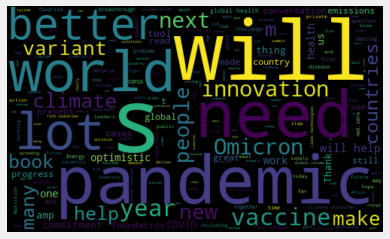

In [107]:
#plot word cloud
allwords = ''.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21 , max_font_size = 119).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [108]:
# get negative neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [109]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,"The fight to eradicate HIV is far from over, b...",0.400000,0.220000,Positive
1,ICYMI here’s a recap of my conversation with ....,0.050000,-0.100000,Negative
2,Thanks for taking the time today to discuss o...,0.100000,0.100000,Positive
3,: We definitely can. Thanks for your ti...,0.350000,0.100000,Positive
4,. has started the conversation about how...,0.375000,0.225000,Positive
...,...,...,...,...
95,. Energy Catalyst is bringing together private...,0.360417,0.041667,Positive
96,Unless smallholder farmers can adapt to climat...,0.250000,0.104167,Positive
97,"Thank you, . This $1B partnership between Ene...",0.800000,0.000000,Neutral
98,: Had an excellent meeting with at the Summ...,0.700000,0.450000,Positive


In [115]:
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
sortedDF['Tweets'].iloc[0]
for i in range (0, sortedDF.shape[0]):
       print(str(j) + ')'+ sortedDF['Tweets'].iloc[i])
       print()
       j = j+1

1) mRna vaccines still can't meet all the demand so figuring out who gets what is complicated.

2) :     So tough question: where do you think SARS-CoV-2 came from? What data do you want to see? An…

3)There’s lots of speculation about what Shakespeare’s life was really like, but we do know that his son died at age 11. Hamnet shares the story of how grief tore the Shakespeare family apart. 

4)The big unknown is how sick omicron makes you. We need to take it seriously until we know more about it. Even if it’s only half as severe as delta, it will be the worst surge we have seen so far because it’s so infectious.

5)About 3.6 billion people—nearly half of the world’s population—lack toilets or use unsafe sanitation. This WorldToiletDay, I’m optimistic this sanitation crisis can be solved. 

6)    People like you and I and Tony Fauci have been subject to a lot of misinformation. I didn't expect that. Some of it like me putting chips in arms doesn't make sense to me - why would I want to 

In [111]:
sortedDF

,Tweets,Subjectivity,Polarity,Analysis
24,mRna vaccines still can't meet all the demand...,1.000000,-0.500000,Negative
9,: So tough question: where do you think S...,0.833333,-0.388889,Negative
61,There’s lots of speculation about what Shakesp...,0.200000,-0.300000,Negative
41,The big unknown is how sick omicron makes you....,0.654497,-0.190476,Negative
66,About 3.6 billion people—nearly half of the wo...,0.166667,-0.166667,Negative
...,...,...,...,...
35,One of my favorite holiday traditions is shari...,0.900000,0.600000,Positive
34,The world has lost a hero. Archbishop Desmond ...,0.583333,0.666667,Positive
30,Understanding how the connections in our brain...,0.700000,0.666667,Positive
86,Getting to zero emissions will be the hardest ...,0.750000,0.800000,Positive


Text(0, 0.5, 'Subjectivity')

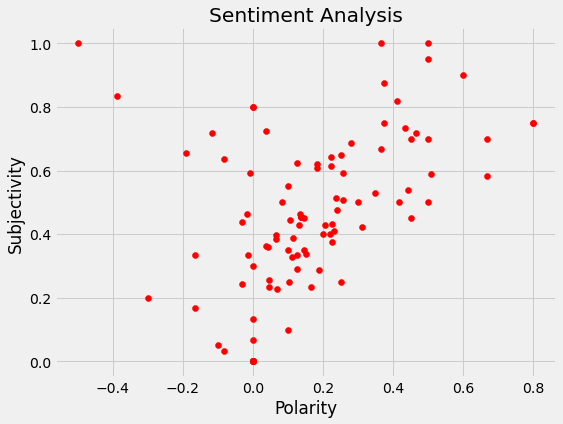

In [112]:
plt.figure(figsize = (8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'].iloc[i],df['Subjectivity'].iloc[i], color = 'RED')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')